<a href="https://colab.research.google.com/github/Vlasovasona/Python-and-ML-Raschka/blob/main/%D0%A1%D0%BE%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B8_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B5%D0%B9_%D0%B8_%D0%BD%D0%B0%D1%81%D1%82%D1%80%D0%BE%D0%B9%D0%BA%D0%B8_%D0%B3%D0%B8%D0%BF%D0%B5%D1%80%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Оптимизация рабочих процессов с помощью конвейеров


---



In [43]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',
header=None)

In [44]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=1)

Вместо того, чтобы выполнять этапы обучения модели и преобразования данных для обучающего и тестового наборов данных по отдельности, мы можем объединить объекты **StandartScaler**, **PCA** и **LogisticRegression** в конвейер:

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test, y_test)
print(f'Точность на тестовых данных: {test_acc:.3f}')

Точность на тестовых данных: 0.956


Подобно вызову метода fit, конвейеры также реализуют метод predict, если последним
шагом в конвейере является оцениватель. Когда мы вызываем метод predict экземпляра
объекта Pipeline и передаем в него данные, они будут проходить через промежуточные
шаги преобразования при вызовах метода transform. На последнем этапе объект оценивателя вернет прогноз на основе преобразованных данных.

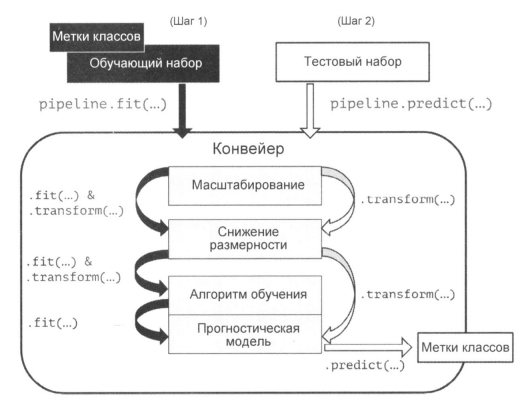

# Использование k-кратной и перекрестной проверки для оценки производительности модели.


---



При k-кратной перекрестной проверке обучающий набор данных случайным образом разбивают на k выборок без возвращения. Затем k-1 выборок, которые также назыают обучающими подвыборками, используют для обучения модели, а на одной оставшейся выборке выполняют оценку производительности.

Затем мы вычисляем среднюю производительность моделей на основе нескольких независимых тестовых выборок, чтобы получить оценку производительности, которая менее чувствительна к разбиению обучающих даннных по сравнению с методом откладывания данных. Как правило, k-кратную перекрестную проверку применяют для настройки модели, т.е. нахождения оптимальных значений гиперпараметров, которые обеспечивают удовлетворительную обобщающую способность модели, измеренную на тестовых выборках.

Когда найдены удовлетворительные значения гиперпараметров, модель повторно обучают на полном наборе данных и получают окончательную оценку производительности
при помощи независимых тестов. Смысл обучения модели на полном наборе данных
после k-кратной перекрестной проверки заключается в том, что, во-первых, нас обычно
интересует одна окончательная модель (а не k отдельных моделей), а во-вторых, использование большего объема обучающих данных обычно дает более точную и надежную модель.


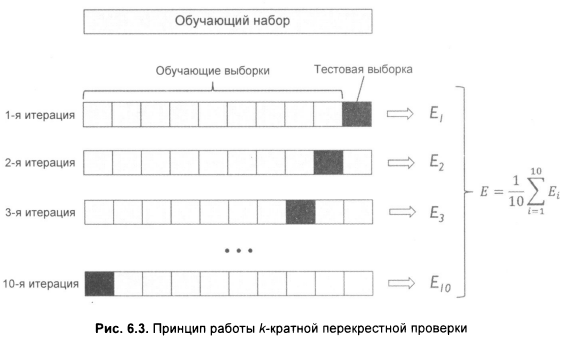

Как показывают данные, хорошим типовым значением k для k-кратной перекрестной проверки является 10.
Если мы работаем с большими наборами данных, то можем смело выбрать меньшее значение для k - например, k = 5, и все же получить точную оценку средней производительности модели при снижении вычислительных затрат на повторное обучение и оценку модели на разных выборках.

In [47]:
# стратифицированная проверка с помощью итератора stratifiedKFold для иллюстрации работы метода
import numpy as np
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
  pipe_lr.fit(X_train[train], y_train[train])
  score = pipe_lr.score(X_train[test], y_train[test])
  scores.append(score)
  print(f'Выборка: {k+1:02d}, '
  f'Распр. кл.: {np.bincount(y_train[train])}, '
  f'Точн.: {score:.3f}')


Выборка: 01, Распр. кл.: [256 153], Точн.: 0.935
Выборка: 02, Распр. кл.: [256 153], Точн.: 0.935
Выборка: 03, Распр. кл.: [256 153], Точн.: 0.957
Выборка: 04, Распр. кл.: [256 153], Точн.: 0.957
Выборка: 05, Распр. кл.: [256 153], Точн.: 0.935
Выборка: 06, Распр. кл.: [257 153], Точн.: 0.956
Выборка: 07, Распр. кл.: [257 153], Точн.: 0.978
Выборка: 08, Распр. кл.: [257 153], Точн.: 0.933
Выборка: 09, Распр. кл.: [257 153], Точн.: 0.956
Выборка: 10, Распр. кл.: [257 153], Точн.: 0.956


In [48]:
mean_acc = np.mean(scores)
std_acc = np.std(scores)
print(f'\n Точночть по CV: {mean_acc:.3f} +/- {std_acc:.3f}')


 Точночть по CV: 0.950 +/- 0.014


In [49]:
# использование cross_val_score (то же самое, но проще)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print(f'Оценки точности по CV: {scores}')

Оценки точности по CV: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]


In [50]:
print(f'\n Точночть по CV: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')


 Точночть по CV: 0.950 +/- 0.014


При использовании метода cross_val_score можно указать параметр n_jobs больше 1, то мы распределим 10 раундов перекрестной проверки на на несколько ядер CPU, а при n_jobs=-1 - все ядра для выполнения параллельных вычислений.

# Алгоритмы отладки с использованием кривых обучения и валидации


---



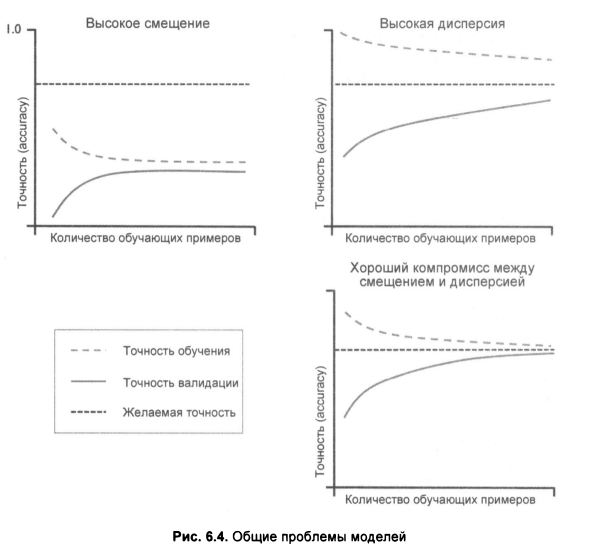

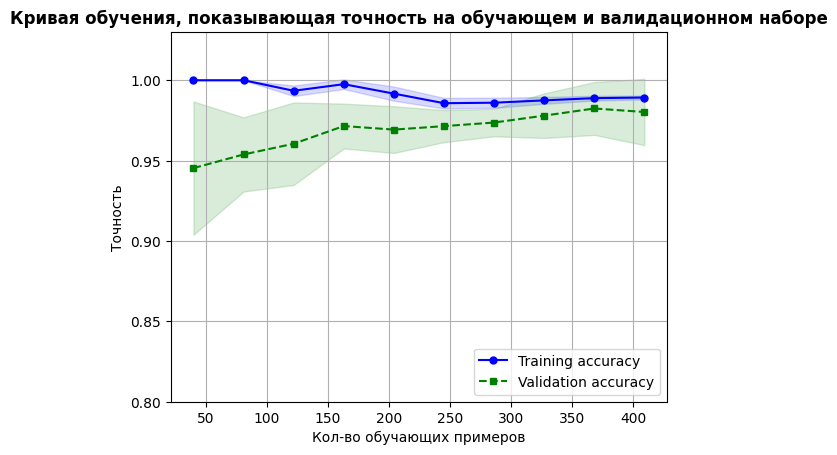

In [51]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2',
                        max_iter=100000))
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(
                                                            0.1, 1.0, 10),
                                                        cv=10,
                                                        n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='blue',
         marker='o', markersize=5,
         label='Training accuracy')
plt.fill_between(train_sizes,
         train_mean + train_std,
         train_mean - train_std,
         alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Кол-во обучающих примеров')
plt.ylabel('Точность')
plt.title(label='Кривая обучения, показывающая точность на обучающем и валидационном наборе',
          fontweight='bold')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.show()

Кривые валидации - это полезный инструмент для улучшения качества модели путем решения проблем, вызванных как переобучением, так и недообучением. Кривые ваоидации похожи на кривые обучения, но вместо того, чтобы строить кривые в зависимости от размера набора, мы варьируем значения параметров модели - например, обратный параметр рагуляризации C в логистической регрессии.

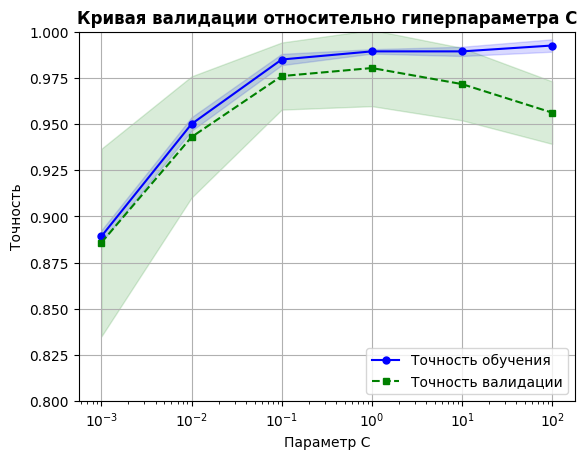

In [56]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    param_name='logisticregression__C',
    param_range=param_range,
    cv=10
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Точность обучения')
plt.fill_between(param_range, train_mean+train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--',
         marker='s', markersize=5, label='Точность валидации')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha = 0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.title('Кривая валидации относительно гиперпараметра C', fontweight='bold')
plt.xlabel('Параметр С')
plt.ylabel('Точность')
plt.ylim([0.8, 1.0])
plt.show()

# Точная настройка моделей с помощью поиска по сетке



---



In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc, # использует k-кратную перекрест. проверку
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  refit=True, # параметр, который автоматически обучает estimator
                  # на полном обучающем наборе если True
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [60]:
# не обязательно, просто показываю, что так тоже можно
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print(f'Точность при тестировании: {clf.score(X_test, y_test):.3f}')

Точность при тестировании: 0.974


In [61]:
gs.score(X_test, y_test)

0.9736842105263158

# Изучение обширных конфигураций гиперпараметров с помощью рандомизированного поиска.



---



На практике поиск по большим сеткам гиперпараметров обходится дорого. Альтернативным подходом к выборке различных комбинаций параметров является рандомизированый поиск. При рандомизированном поиске мы случайно выбираем лишь некоторые конфигурации гиперпараметров из распределений (или дискретных наборов).

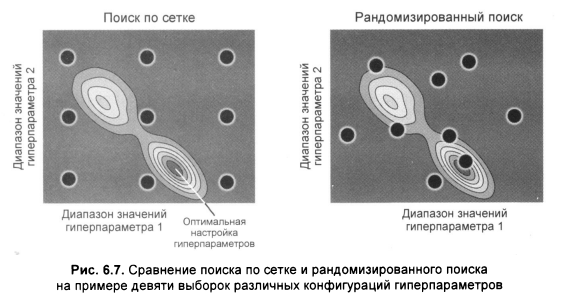

Хотя RandomizedSearchCV может принимать аналогичные дискретные списки значений
в качестве входных данных для сетки параметров, что полезно при рассмотрении категориальных гиперпараметров, его основное преимущество заключается в том, что список значений можно заменить распределением для выборки. Так, например, мы можем
заменить предьщущий список следующим распределением из SciPy:

In [62]:
import scipy.stats
param_range = [0.0001, 0.001, 0.01, 0.1,
               1.0, 10.0, 100.0, 1000.0]

param_range = scipy.stats.loguniform(0.0001, 1000.0)

np.random.seed(1)
param_range.rvs(10)

array([8.30145146e-02, 1.10222804e+01, 1.00184520e-04, 1.30715777e-02,
       1.06485687e-03, 4.42965766e-04, 2.01289666e-03, 2.62376594e-02,
       5.98924832e-02, 5.91176467e-01])

In [65]:
from sklearn.model_selection import RandomizedSearchCV
pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))
param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]

rs = RandomizedSearchCV(estimator=pipe_svc,
                        param_distributions=param_grid,
                        scoring='accuracy',
                        refit=True,
                        n_iter=20,
                        cv=10,
                        random_state=1,
                        n_jobs=-1)
rs = rs.fit(X_train, y_train)
print(rs.best_score_)
print(rs.best_params_)

0.9780676328502416
{'svc__C': np.float64(0.05971247755848463), 'svc__kernel': 'linear'}


Глядя на этот пример кода, несложно заметить, что использование RandomizedSearchCV
очень похоже на GridSearchCV, за исключением того, что мы можем задействовать распределения в качестве диапазонов параметров и указать количество итераций (в нашем
случае - 20), установив n_iter;20.

# Поиск гиперпараметров методом последовательного деления пополам


---



В общем виде эта несложная процедура состоит из таких шагов:
1. Формируем большой набор конфигураций-кандидатов с помощью случайной выборки.
2. Обучаем модели с применением ограниченных ресурсов - например, на небольшом подмножестве обучающих данных (в отличие от использования всего обучающего набора).
3. Отбрасываем нижние 50% моделей, исходя из их прогнозируемой производительности.
4. Возвращаемся к шагу 2 с увеличенным количеством ресурсов.
Эти шаги повторяются до тех пор, пока не останется только одна конфигурация гиперпараметров. Существует также реализация последовательного деления пополам для
поиска по сетке под названием HalvingGridSearchcv, где на шаге 1 вместо случайных выборок используются все доступные конфигурации гиперпараметров.


In [66]:
from sklearn.experimental import enable_halving_search_cv

In [69]:
from sklearn.model_selection import HalvingRandomSearchCV
hs = HalvingRandomSearchCV(pipe_svc,
    param_distributions=param_grid,
    n_candidates='exhaust', # вместо фикс.кол-ва итераций
    resource='n_samples', # указывает, что размер обучающего набора - ресурс,
                           # который нужно варьировать между раундами набора
    factor=1.5,           # указываем сколько кандидатов тсеивает в каждом раунде
    random_state=1,
    n_jobs=-1)

In [70]:
hs = hs.fit(X_train, y_train)
print(hs.best_score_)
print(hs.best_params_)

0.9617647058823529
{'svc__C': np.float64(4.934834261073333), 'svc__kernel': 'linear'}


In [72]:
clf = hs.best_estimator_
print(f'Toчнocть при тестировании: {hs.score(X_test, y_test): .3f} ')

Toчнocть при тестировании:  0.982 


# Выбор алгоритма методом вложенной перекрестной проверки



---



Использование k-кратной перекрестной проверки в сочетании с поиском по сетке или
рандомизированным поиском является хорошим способом точной настройки производительности модели путем изменения значений ее гиперпараметров, как было показано
в предыдущих подразделах. Однако, если вы не ограничиваетесь подбором гиперпараметров и хотите выбирать среди различных алгоритмов машинного обучения, рекомендуется использовать в.1оженную перекрестную проверку (nested cross-validation).

In [87]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print(f"Точность перекрестной проверки: {np.mean(scores):.3f} +/- {np.std(scores):.3f}")

Точность перекрестной проверки: 0.974 +/- 0.015


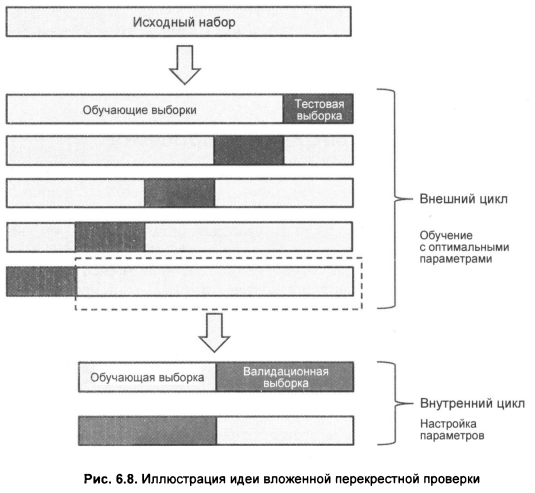

In [89]:
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_grid=[{'max_depth': [1,2,3,4,5,6,None]}],
    scoring='accuracy',
    cv=2
)

scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print(f"Точность перекрестной проверки: {np.mean(scores):.3f} +/- {np.std(scores):.3f}")

Точность перекрестной проверки: 0.934 +/- 0.016


# Обзор различных показателей оценки эффективности



---



In [90]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


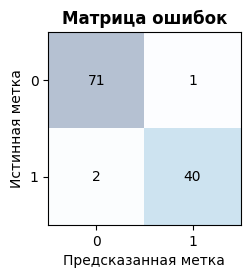

In [91]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=i, s=confmat[i, j],
            va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')
plt.xlabel('Предсказанная метка')
plt.ylabel('Истинная метка')
plt.title(label='Матрица ошибок', fontweight='bold')
plt.show()

$$ EER = \frac{FP + FN}{FP + FN + TP + TN} $$

$$ accuracy = \frac{TP + TN}{FP + FN + TP + TN} $$

Доля истинно положительных случаев (True Positive Rate, TPR) и доля ложноположительных случаев (False Positive Rate, FPR) - это показатели производительности, которые особенно полезны при решении задач с несбалансированными классами:

$$ FPR = \frac{FP}{N} = \frac{FP}{FP + TN} $$

$$ TPR = \frac{TP}{N} = \frac{TP}{TP + FN} $$

Показатели производительности точность (precision, PRE) и полнота (recall, REC) непосредственно связаны с долями ТР и ТN, и фактически REC является синонимом TPR:

$$ recall = TPR = \frac{TP}{P} = \frac{TP}{TP + FN} $$

$$ precision = PRE = \frac{TP}{TP + FP} $$

Чтобы найти компромисс между положительными и отрицательными сторонами оптимизации PRE и REC, используют *среднее гармоническое* PRE и REC, или так называемую оценку **F1**:

$$ F1 =\frac{2×precision×recall}{precision×recall} $$

Наконец, мерой, обобщающей матрицу несоответствий, является коэффициент корреляции Мэтьюза (Matthews Correlation Coefficient, МCC), который особенно популярен в контексте биологических исследований.

$$ MCC = \frac{TP × TN - FP × FN}{\sqrt{(TP + FP)(TP + FN)(TN + FP)(TN + FN)}} $$

В отличие от PRE, REC и оценки F 1, МСС находится в диапазоне от -1 до 1 и учитывает все элементы матрицы несоответствий (в отличие, например, от оценки Fl, которая
не включает ТN). Хотя значения МСС сложнее интерпретировать, чем показатель Fl,
коэффициент корреляции Мэтьюза считается лучшим показателем.

In [92]:
from sklearn.metrics import matthews_corrcoef
mcc_val = matthews_corrcoef(y_true=y_test, y_pred=y_pred)
print(f'MCC: {mcc_val:.3f}')

MCC: 0.943


# Построение AUC-ROC кривой



---



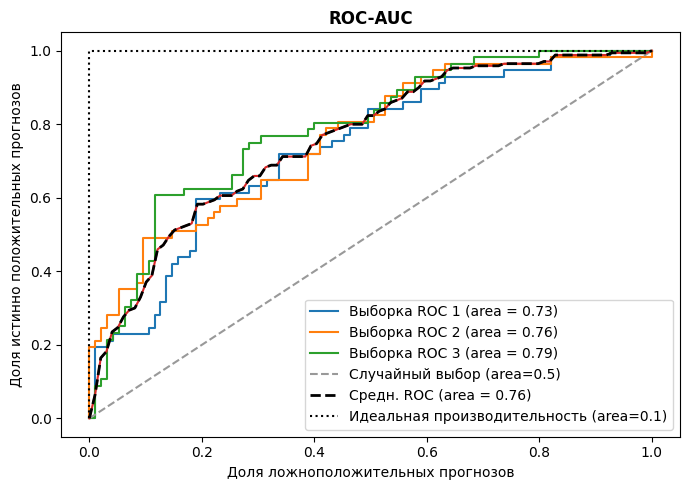

In [97]:
from sklearn.metrics import roc_curve, auc
from numpy import interp

pipe_lr = make_pipeline(
    StandardScaler(),
    PCA(n_components=2),
    LogisticRegression(penalty='l2', random_state=1,
                       solver='lbfgs', C=100.0)
)

X_train2 = X_train[:, [4, 14]]
cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))
fig = plt.figure(figsize=(7,5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
for i, (train, test) in enumerate(cv):
  probas = pipe_lr.fit(
      X_train2[train],
      y_train[train]
  ).predict_proba(X_train2[test])

  fpr, tpr, thresholds = roc_curve(y_train[test],
                                   probas[:, 1],
                                   pos_label=1)

  mean_tpr += interp(mean_fpr, fpr, tpr)
  mean_tpr[0] = 0.0
  roc_auc = auc(fpr, tpr)

  plt.plot(fpr,
           tpr,
           label=f'Выборка ROC {i+1} (area = {roc_auc:.2f})')

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Случайный выбор (area=0.5)')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, 'k--', label=f'Средн. ROC (area = {mean_auc:.2f})', lw=2)

plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Идеальная производительность (area=0.1)')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Доля ложноположительных прогнозов')
plt.ylabel('Доля истинно положительных прогнозов')
plt.title(label="ROC-AUC", fontweight='bold')
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

# Метрики оценивания многоклассовой классификации



---



scikit-learn также содержит методы макро- и микроусреднения, позволяющие распространить эти метрики оценки на многоклассовые задачи с помощью
классификации типа «один против всех» (One-vs-All, OvA). *Микроусреднение* (microaverage) рассчитывается по отдельным ТР, ТN, FP и FN системы. Например, микроусредненное значение показателя точности в k-классовой системе можно рассчитать так:

$$ PRE_{micro} = \frac{TP_1 + ... + TP_k}{TP_1 + ... + TP_k + FP_1 + ... + FP_k} $$

*Макроусреднение* вычисляют просто как среднее оценки различных систем:

$$ PRE_{macro} = \frac{PRE_1 + ... + PRE_k}{k} $$

# Борьба с дисбалансом классов


---



In [101]:
X_imb = np.vstack((X[y == 0], X[y == 1][:40]))
y_imb = np.hstack((y[y == 0], y[y == 1][:40]))

In [102]:
y_pred = np.zeros(y_imb.shape[0])
np.mean(y_pred == y_imb) * 100

np.float64(89.92443324937027)

Один из способов справиться с несбалансированными пропорциями классов во время обучения модели - назначить *больший штраф за неправильные пронозы* для миноритарного класса. Необходимо установить значение параметра **class_weight='balanced'**, который поддерживает большинство классификаторов.

К другим популярным методам борьбы с дисбалансом классов относятся повышение дискретизации миноритарного класса, понижение дискретизации доминирующего класса и создание синтетических обучающих примеров.

Библиотека sklearn содержит простую функцию resample, которая помогает увеличить дискретизацию миноритарного класса путем создания новых выборок из набора данных с возвращением.

In [103]:
from sklearn.utils import resample
print('Старое кол-во экз. класса 1:', X_imb[y_imb == 1].shape[0])

Старое кол-во экз. класса 1: 40


In [105]:
X_upsampled, y_upsampled = resample(
    X_imb[y_imb == 1],
    y_imb[y_imb == 1],
    replace=True,
    n_samples=X_imb[y_imb == 0].shape[0],
    random_state=123
)
print('Новое кол-во экземпляров класса 1:', X_upsampled.shape[0])

Новое кол-во экземпляров класса 1: 357


In [107]:
X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

In [108]:
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

np.float64(50.0)